In [1]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualization
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

#import os
#print(os.listdir('../input/'))





In [2]:
data = pd.read_csv("C:\\Users\\saham\\Downloads\\Mall_Customers_dataset.csv")
dat = ff.create_table(data.head())
py.iplot(dat)

In [3]:
#describe data
desc = ff.create_table(data.describe())
py.iplot(desc)
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#checking if there is any null data
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

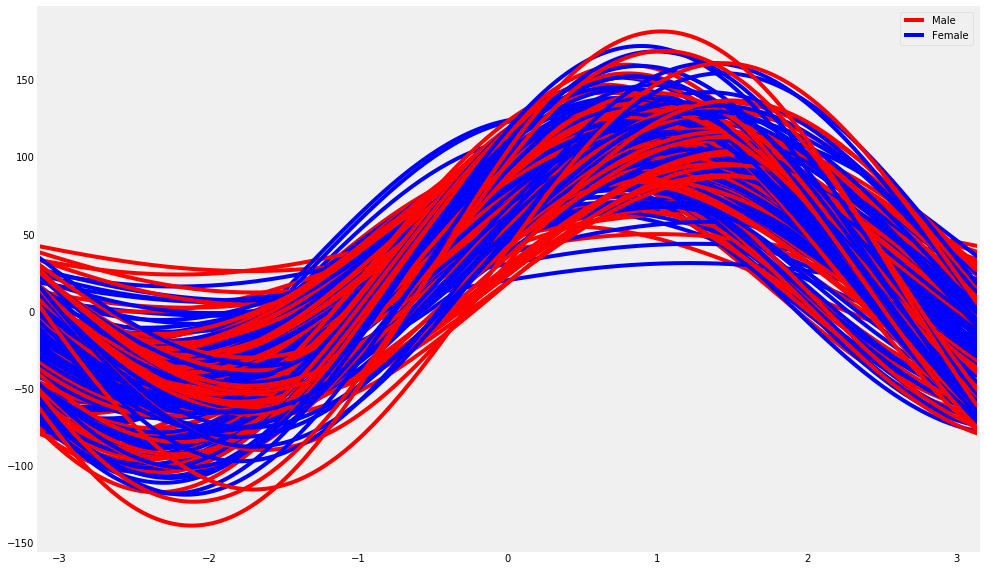

In [7]:
plt.rcParams['figure.figsize'] = (15,10)

plotting.andrews_curves(data.drop("CustomerID", axis =1), "Gender",color=('r','b'))
plt.show()

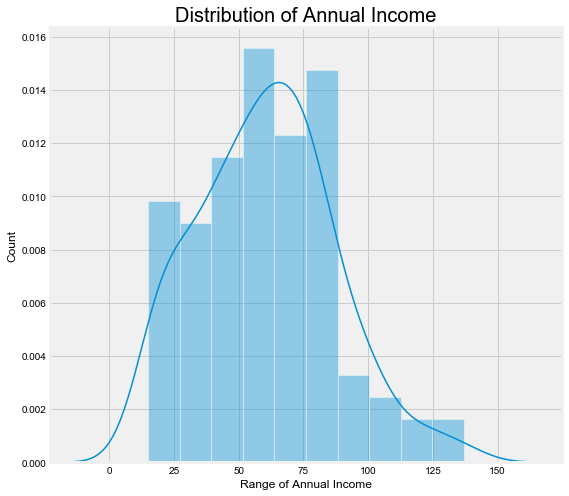

In [8]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18,8)
plt.subplot(1,2,1)
sns.set(style = 'whitegrid')

sns.distplot(data['Annual Income (k$)'])
plt.title("Distribution of Annual Income", fontsize = 20)
plt.xlabel("Range of Annual Income")
plt.ylabel("Count")
plt.show()


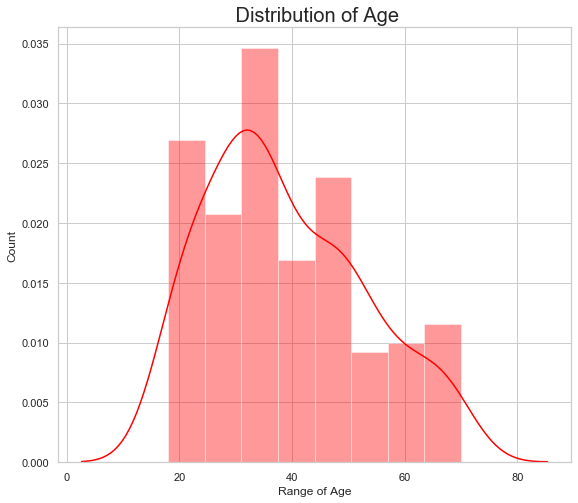

In [9]:
plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title(" Distribution of Age", fontsize = 20)
plt.xlabel("Range of Age")
plt.ylabel("Count")
plt.show()

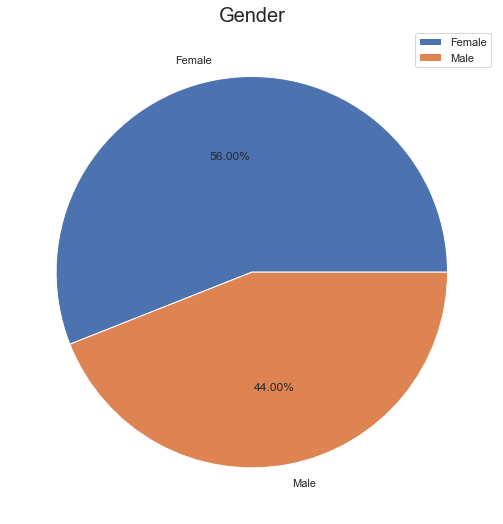

In [10]:
labels = [ 'Female', 'Male' ]
size = data['Gender'].value_counts()

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size , labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize =20)
plt.legend()
plt.show()

plt.close()

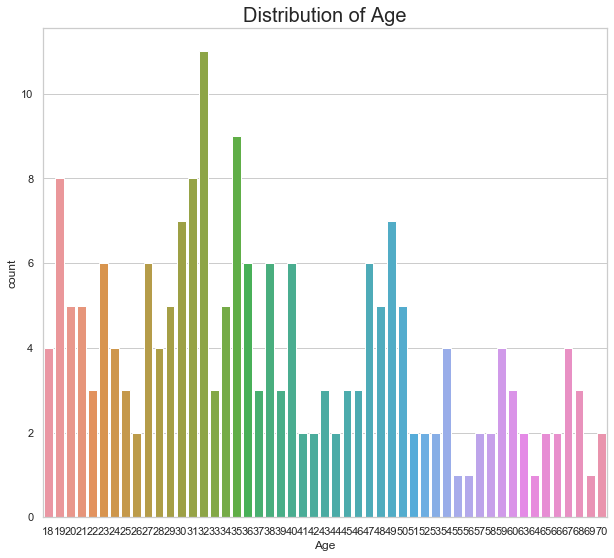

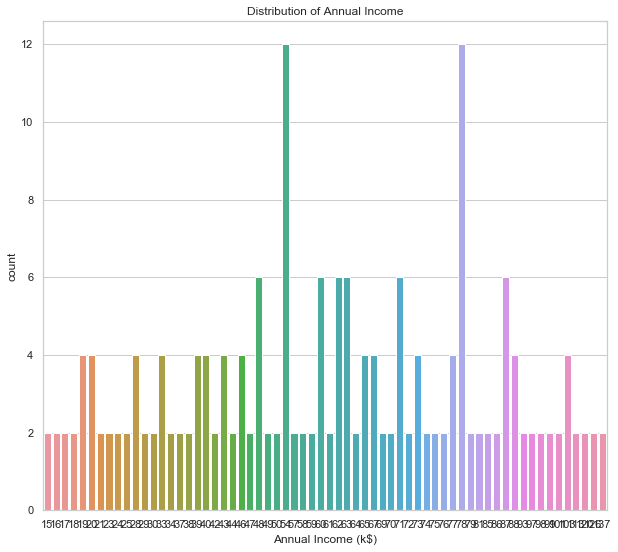

In [11]:

sns.countplot(data['Age'])
plt.title("Distribution of Age", fontsize = 20)
plt.show()

sns.countplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.show()

Text(0.5, 1.0, 'Distrution of Spending Score')

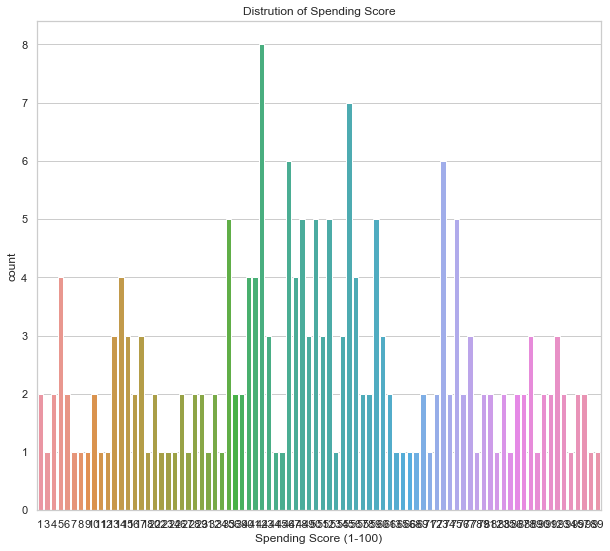

In [12]:
sns.countplot(data['Spending Score (1-100)'])
plt.title("Distrution of Spending Score")


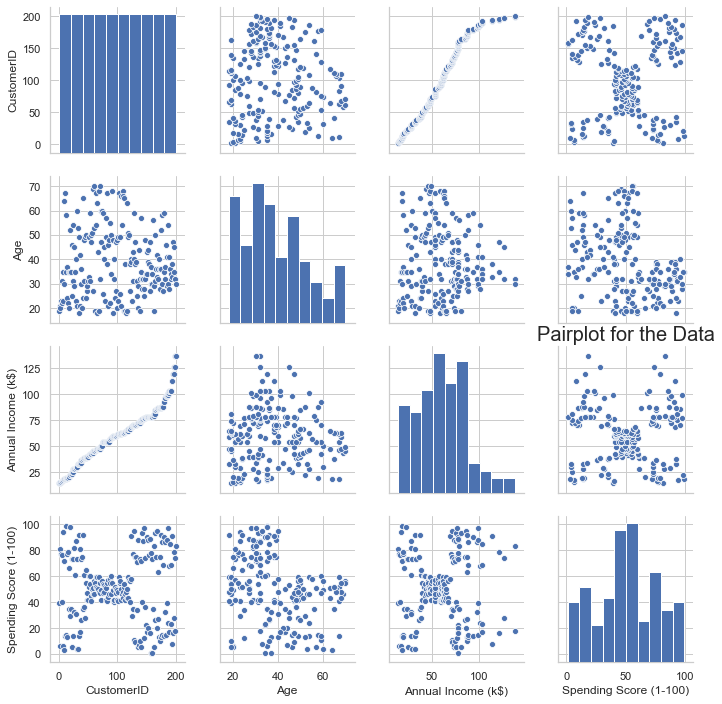

In [13]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

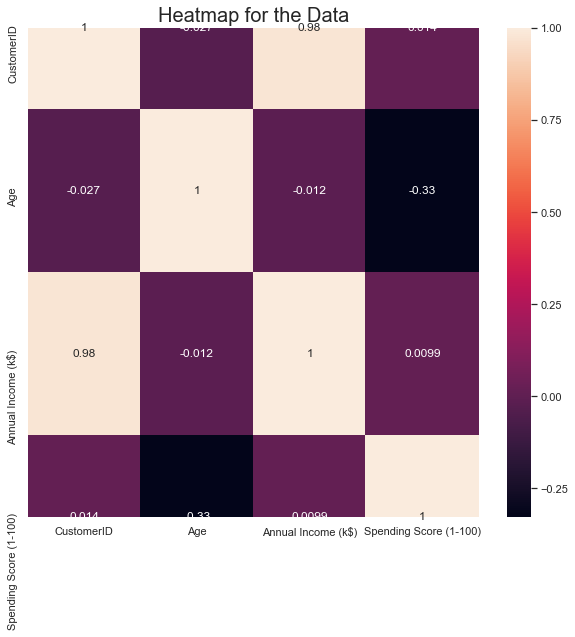

In [14]:
#plt.rcParams['figure.figsize'] = (15,8)
sns.heatmap(data.corr(), annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [15]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


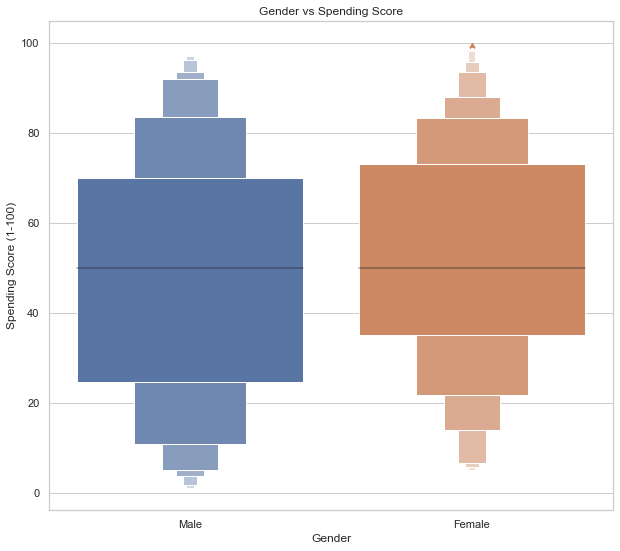

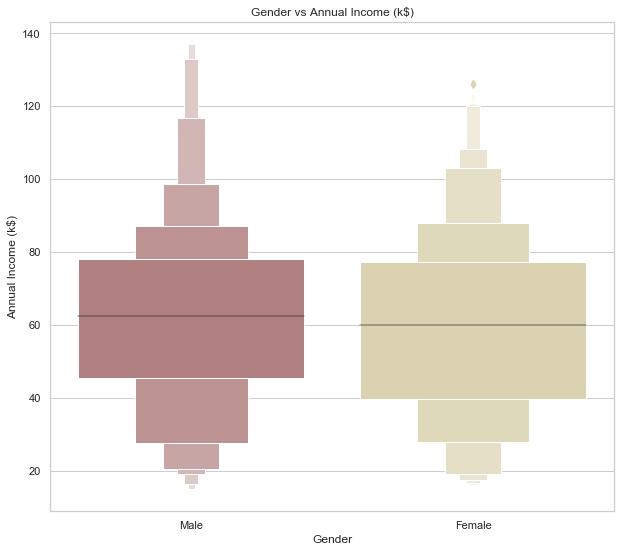

In [16]:
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'])
plt. title("Gender vs Spending Score")
plt.show()

sns.boxenplot(data['Gender'],data['Annual Income (k$)'], palette ='pink')
plt. title("Gender vs Annual Income (k$)")
plt.show()


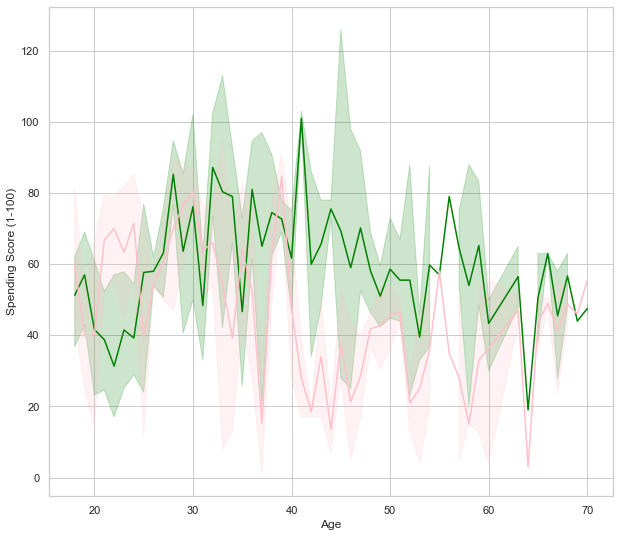

In [17]:
y = data['Annual Income (k$)']
x = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(data['Age'],data['Annual Income (k$)'], color = 'green')
sns.lineplot(data['Age'],data['Spending Score (1-100)'], color = 'pink')



In [18]:
#########################  Clustering Analysis  ###########################



In [19]:
x = data.iloc[:, [3,4]].values
print(x.shape)
print(data.shape)

(200, 2)
(200, 5)


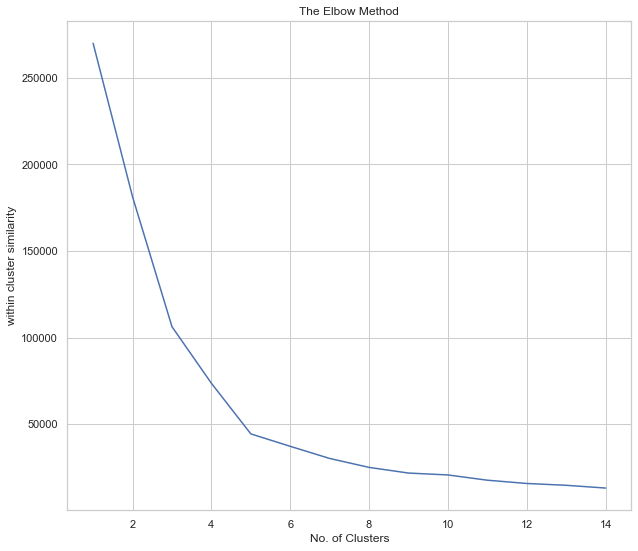

In [20]:
# 1. K-means

# use elbo method to find  Optimal num of cluster
from sklearn.cluster import KMeans

wcss = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("within cluster similarity")
plt.show()

In [21]:
# K mean with 5 cluster 

km = KMeans( n_clusters = 5, init = "k-means++")
# fir KMeans to X=3,4 column of dataset -'Annual Income (k$)', 'Spending Score (1-100)'
y_means = km.fit_predict(x)

# Visualizing the Cluster
#plt.scatter(x[y_means == 0])

    

In [22]:
x[10:20,].shape

(10, 2)

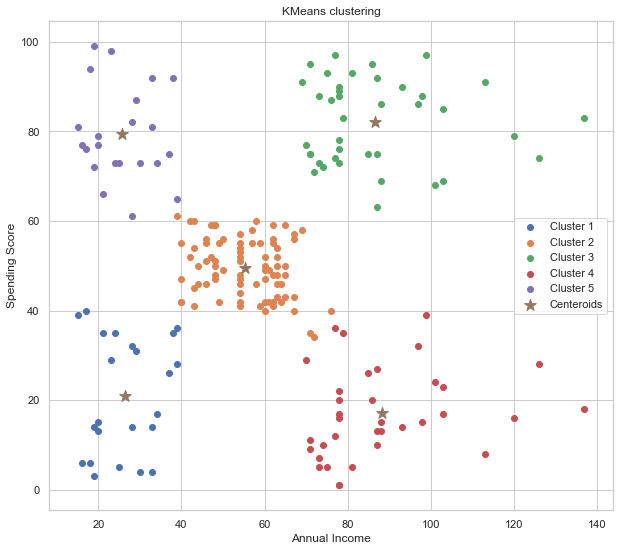

In [23]:
plt.scatter(x[y_means ==0, 0], x[y_means ==0, 1], label = "Cluster 1")
plt.scatter(x[y_means ==1, 0], x[y_means ==1, 1], label = "Cluster 2")
plt.scatter(x[y_means ==2, 0], x[y_means ==2, 1], label = "Cluster 3")
plt.scatter(x[y_means ==3, 0], x[y_means ==3, 1], label = "Cluster 4")
plt.scatter(x[y_means ==4, 0], x[y_means ==4, 1], label = "Cluster 5")
plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1], s =150,marker= '*', label = 'Centeroids') # centeroids
plt.xlabel('Annual Income') #1 col
plt.ylabel('Spending Score') #2 col
plt.legend()
plt.title("KMeans clustering")
plt.show()

In [24]:
################ Hierarchical Clustering  ################

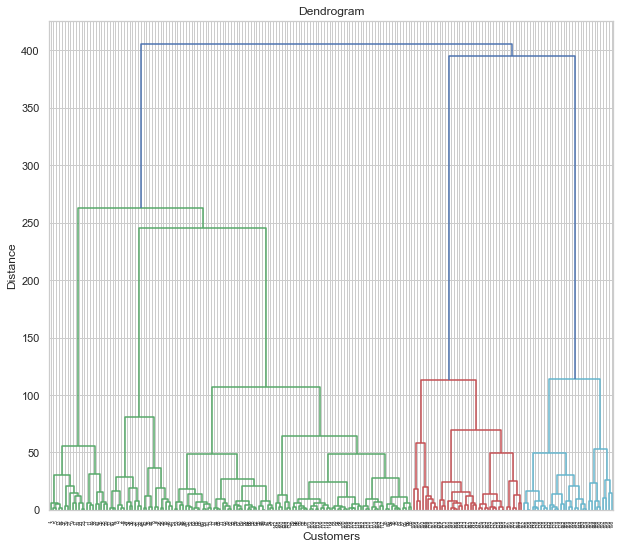

In [34]:
# Using Dendrogram to find optimal Cluster

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
       # ward = minimizes the varience of cluster being merged
    
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5)
y = hc.fit_predict(x)

In [50]:
from sklearn.metrics import silhouette_score

In [55]:
silhouette_score(x,y)

0.5529945955148897

In [65]:
#Clusters based on Age
x = data.iloc[: ,  [2,4]].values

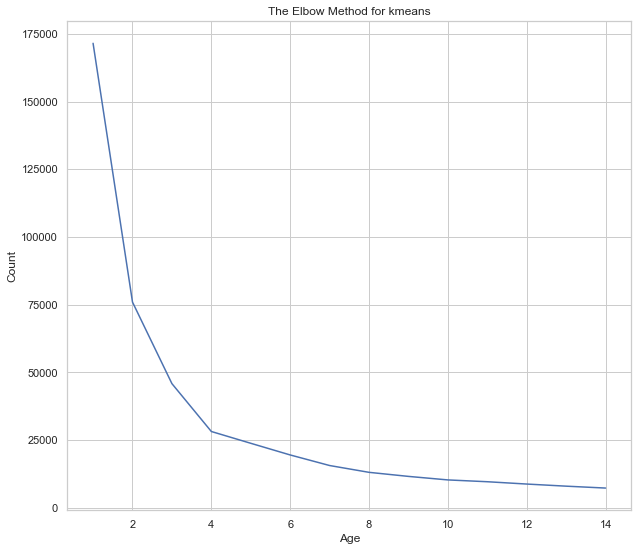

In [66]:
# kMeans

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method for kmeans')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


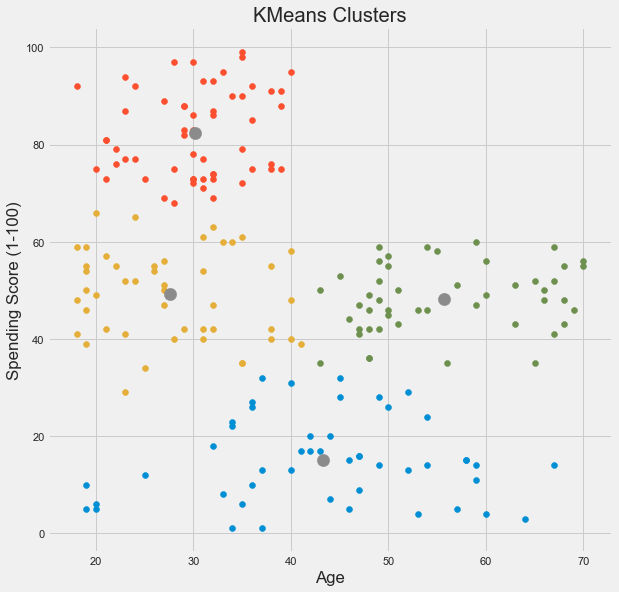

In [68]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.title('KMeans Clusters')

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1] )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1])
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1])
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =150)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [70]:
# Kmeans for 3 dimensional data
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [74]:
labels = km.labels_
centroids = km.cluster_centers_
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [83]:
data['labels'] = labels
data.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'labels'],
      dtype='object')

In [82]:
import plotly.express as px
fig = px.scatter_3d(x = data['Age'], y = data['Spending Score (1-100)'], z= data['Annual Income (k$)'] ,color=data['labels'])

fig.show()